# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Mia Putri Aulia Setyowati
- **Email:** m006d4kx1775@bangkit.academy
- **ID Dicoding:** miaputriaulia

## Menentukan Pertanyaan Bisnis

- Bagaimana kondisi penjualan dari tahun 2017 sampai Agustus 2018?
- Kota mana saja yang membuat pembelian terbanyak dan cara pembayaran mereka menggunakan apa?
- Apakah durasi pengiriman berpengaruh terhadap review pelanggan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv("customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
orders_df = pd.read_csv("orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
order_rev_df = pd.read_csv("order_reviews_dataset.csv")
order_rev_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [5]:
order_pay_df = pd.read_csv("order_payments_dataset.csv")
order_pay_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### Assessing Data

####1. Customer Dataset (Tidak ditemukan masalah)

In [6]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [7]:
print("Jumlah duplikasi customers dataset: ", customers_df.duplicated().sum())

Jumlah duplikasi customers dataset:  0


####2. Orders Dataset
- **Tipe data tanggal masih object**
- **Ada missing value di tanggal approved_at, carrier_date, cust_date.**


In [8]:
orders_df.info()  #Date harusnya datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [9]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [10]:
orders_df.isna().sum() #Ada missing value di approved_at, carrier_date, cust_date.

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

####3. Order Review Dataset (hanya fokus ke order_id dan banyak review_score)
**Ada order id yang memilikii beberapa review**

In [11]:
order_rev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [12]:
order_rev_df.order_id.value_counts() #Ada order id yang memilikii beberapa review

c88b1d1b157a9999ce368f218a407141    3
8e17072ec97ce29f0e1f111e598b0c85    3
df56136b8031ecd28e200bb18e6ddb2e    3
03c939fd7fd3b38f8485a0f95798f1f6    3
5cb890a68b91b6158d69257e4e2bc359    2
                                   ..
5b4e9a12d219f34f5c2de9f8d620b19d    1
a6da096d974acc000962856d7386448a    1
75e0647c26de647eca3421e9cc66c9da    1
bad0467c52f23cdc71e9fa139d4a8afd    1
90531360ecb1eec2a1fbb265a0db0508    1
Name: order_id, Length: 98673, dtype: int64

In [13]:
order_rev_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### 4. Order Payments Dataset
**Terdapat beberapa order_id memiliki banyak data pembayaran**

In [14]:
order_pay_df.info() #Terlihat order_id di sini lebih banyak dibanding order_id di data lain

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [15]:
order_pay_df.order_id.value_counts() #Ada beberapa order_id yang muncul lebih dari 1 kali

fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
285c2e15bebd4ac83635ccc563dc71f4    22
895ab968e7bb0d5659d16cd74cd1650c    21
fedcd9f7ccdc8cba3a18defedd1a5547    19
                                    ..
6d2a30c9b7dcee3ed507dc9a601f99e7     1
a7737f6d9208dd56ea498a322ed3c37f     1
646e62df54f3e236eb6d5ff3b31429b8     1
e115da7a49ec2acf622e1f31da65cfb9     1
28bbae6599b09d39ca406b747b6632b1     1
Name: order_id, Length: 99440, dtype: int64

In [16]:
order_pay_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


### Cleaning Data

#### Data orders_df
- **Mengganti ke tipe data datetime**
- **Mengisi missing value di approved_at, carrier_date, cust_date.**

In [17]:
#Mengganti ke tipe data datetime
datetime_columns = ["order_purchase_timestamp", "order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]
for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [18]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [19]:
orders_df["order_status"].value_counts() #Hanya fokus ke delivered dan shipped.

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [20]:
order_sent = orders_df[orders_df['order_status'].isin(['shipped', 'delivered'])]
order_sent

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [21]:
order_sent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97585 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       97585 non-null  object        
 1   customer_id                    97585 non-null  object        
 2   order_status                   97585 non-null  object        
 3   order_purchase_timestamp       97585 non-null  datetime64[ns]
 4   order_approved_at              97571 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97583 non-null  datetime64[ns]
 6   order_delivered_customer_date  96470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  97585 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.7+ MB


In [22]:
order_sent.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date        2
order_delivered_customer_date    1115
order_estimated_delivery_date       0
dtype: int64

#####Mengecek apakah:
- estimated delivery berkorelasi dengan delivered customer
- purchase time berkorelasi dengan approved time

In [23]:
tes = order_sent.copy()
tes.dropna(axis = 0, inplace = True)
tes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96455 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96455 non-null  object        
 1   customer_id                    96455 non-null  object        
 2   order_status                   96455 non-null  object        
 3   order_purchase_timestamp       96455 non-null  datetime64[ns]
 4   order_approved_at              96455 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96455 non-null  datetime64[ns]
 6   order_delivered_customer_date  96455 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96455 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [24]:
tes['order_delivered_customer_date'] = pd.to_datetime(tes['order_delivered_customer_date'])
tes['order_estimated_delivery_date'] = pd.to_datetime(tes['order_estimated_delivery_date'])

# Calculate time differences
tes['delivery_delay'] = (tes['order_delivered_customer_date'] - tes['order_estimated_delivery_date']).dt.days

# Check correlation
correlation = tes['delivery_delay'].corr(tes['delivery_delay'])

print("Correlation between delivery delay and estimated delivery date:", correlation)

Correlation between delivery delay and estimated delivery date: 1.0


In [25]:
tes['order_purchase_timestamp'] = pd.to_datetime(tes['order_purchase_timestamp'])
tes['order_approved_at'] = pd.to_datetime(tes['order_approved_at'])

# Calculate time differences
tes['delivery_delay'] = (tes['order_purchase_timestamp'] - tes['order_approved_at']).dt.days

# Check correlation
correlation = tes['delivery_delay'].corr(tes['delivery_delay'])

print("Correlation between delivery delay and estimated delivery date:", correlation)

Correlation between delivery delay and estimated delivery date: 0.9999999999999999


#####Mengisi nilai kosong di data orders yang baru yaitu order_sent

In [26]:
order_sent['order_delivered_customer_date'].fillna(order_sent['order_estimated_delivery_date'], inplace=True)
order_sent['order_approved_at'].fillna(order_sent['order_purchase_timestamp'], inplace=True)
order_sent = order_sent.drop(columns = 'order_delivered_carrier_date') #Karena tidak diperlukan
order_sent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97585 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       97585 non-null  object        
 1   customer_id                    97585 non-null  object        
 2   order_status                   97585 non-null  object        
 3   order_purchase_timestamp       97585 non-null  datetime64[ns]
 4   order_approved_at              97585 non-null  datetime64[ns]
 5   order_delivered_customer_date  97585 non-null  datetime64[ns]
 6   order_estimated_delivery_date  97585 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(3)
memory usage: 6.0+ MB


<ipython-input-26-5c5fe6d76da9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_sent['order_delivered_customer_date'].fillna(order_sent['order_estimated_delivery_date'], inplace=True)
<ipython-input-26-5c5fe6d76da9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_sent['order_approved_at'].fillna(order_sent['order_purchase_timestamp'], inplace=True)


####Data Payment

In [27]:
order_pay_df.info() #Inakurasi jumlah data pada order_id

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [28]:
order_pay_df.order_id.value_counts()

fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
285c2e15bebd4ac83635ccc563dc71f4    22
895ab968e7bb0d5659d16cd74cd1650c    21
fedcd9f7ccdc8cba3a18defedd1a5547    19
                                    ..
6d2a30c9b7dcee3ed507dc9a601f99e7     1
a7737f6d9208dd56ea498a322ed3c37f     1
646e62df54f3e236eb6d5ff3b31429b8     1
e115da7a49ec2acf622e1f31da65cfb9     1
28bbae6599b09d39ca406b747b6632b1     1
Name: order_id, Length: 99440, dtype: int64

In [29]:
#Ambil sembarang salah satu order_id yang datanya lebih dari 1
payment1 = order_pay_df[order_pay_df['order_id'] == 'ccf804e764ed5650cd8759557269dc13']
payment1

,order_id,payment_sequential,payment_type,payment_installments,payment_value
4346,ccf804e764ed5650cd8759557269dc13,19,voucher,1,1.68
14362,ccf804e764ed5650cd8759557269dc13,1,credit_card,1,2.20
16279,ccf804e764ed5650cd8759557269dc13,14,voucher,1,0.97
18876,ccf804e764ed5650cd8759557269dc13,15,voucher,1,1.11
21447,ccf804e764ed5650cd8759557269dc13,6,voucher,1,2.26
32393,ccf804e764ed5650cd8759557269dc13,26,voucher,1,23.10
38001,ccf804e764ed5650cd8759557269dc13,2,voucher,1,1.45
39132,ccf804e764ed5650cd8759557269dc13,25,voucher,1,1.53
40369,ccf804e764ed5650cd8759557269dc13,5,voucher,1,2.69
40387,ccf804e764ed5650cd8759557269dc13,3,voucher,1,1.15


In [30]:
#Ambil sembarang salah satu order_id yang datanya lebih dari 1
payment1 = order_pay_df[order_pay_df['order_id'] == 'ccf804e764ed5650cd8759557269dc13']
print(payment1.head())

print("\nTotal payment:" , payment1.payment_value.sum())
#Terlihat bahwa total payment value sesuai dengan total yang harus dibayar

print("\nModus payment type:" ,payment1.payment_type.mode()[0])

                               order_id  payment_sequential payment_type  \
4346   ccf804e764ed5650cd8759557269dc13                  19      voucher   
14362  ccf804e764ed5650cd8759557269dc13                   1  credit_card   
16279  ccf804e764ed5650cd8759557269dc13                  14      voucher   
18876  ccf804e764ed5650cd8759557269dc13                  15      voucher   
21447  ccf804e764ed5650cd8759557269dc13                   6      voucher   

       payment_installments  payment_value  
4346                      1           1.68  
14362                     1           2.20  
16279                     1           0.97  
18876                     1           1.11  
21447                     1           2.26  

Total payment: 62.68

Modus payment type: voucher


In [31]:
#Membuat tabel payment_type yang paling banyak muncul tiap order id
cust_pay = order_pay_df.groupby(["order_id"],as_index=False).agg(lambda x: x.mode().iloc[0])
cust_pay = cust_pay.drop(columns = 'payment_sequential')
cust_pay = cust_pay.drop(columns = 'payment_installments')
cust_pay = cust_pay.drop(columns = 'payment_value')
cust_pay.reset_index()
cust_pay

,order_id,payment_type
0,00010242fe8c5a6d1ba2dd792cb16214,credit_card
1,00018f77f2f0320c557190d7a144bdd3,credit_card
2,000229ec398224ef6ca0657da4fc703e,credit_card
3,00024acbcdf0a6daa1e931b038114c75,credit_card
4,00042b26cf59d7ce69dfabb4e55b4fd9,credit_card
...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,boleto
99436,fffcd46ef2263f404302a634eb57f7eb,boleto
99437,fffce4705a9662cd70adb13d4a31832d,credit_card
99438,fffe18544ffabc95dfada21779c9644f,credit_card


In [32]:
#Membuat tabel total pembayaran tiap order id
order_value = order_pay_df.groupby(["order_id"],as_index=False)["payment_value"].sum()
order_value

,order_id,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04
...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,343.40
99436,fffcd46ef2263f404302a634eb57f7eb,386.53
99437,fffce4705a9662cd70adb13d4a31832d,116.85
99438,fffe18544ffabc95dfada21779c9644f,64.71


In [33]:
#Membuat tabel berisi order_id beserta total pembayaran dan cara/tipe pembayarannya
def_payment = pd.merge(
    left=order_value,
    right=cust_pay,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
def_payment

,order_id,payment_value,payment_type
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,credit_card
1,00018f77f2f0320c557190d7a144bdd3,259.83,credit_card
2,000229ec398224ef6ca0657da4fc703e,216.87,credit_card
3,00024acbcdf0a6daa1e931b038114c75,25.78,credit_card
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,credit_card
...,...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,343.40,boleto
99436,fffcd46ef2263f404302a634eb57f7eb,386.53,boleto
99437,fffce4705a9662cd70adb13d4a31832d,116.85,credit_card
99438,fffe18544ffabc95dfada21779c9644f,64.71,credit_card


In [34]:
#Cek salah satu order_id yang double sebelumnya
def_payment[def_payment["order_id"]=='ccf804e764ed5650cd8759557269dc13'] #Sesuai

,order_id,payment_value,payment_type
79611,ccf804e764ed5650cd8759557269dc13,62.68,voucher


####Data Order Review
**Membuat tabel berisi order id dengan masing-masing review_score hanya ada 1 review**

In [35]:
satu_order_rev = order_rev_df.groupby('order_id').filter(lambda x: x['review_score'].nunique() == 1)
review = satu_order_rev[['order_id', 'review_score']].drop_duplicates()
review

,order_id,review_score
0,73fc7af87114b39712e6da79b0a377eb,4
1,a548910a1c6147796b98fdf73dbeba33,5
2,f9e4b658b201a9f2ecdecbb34bed034b,5
3,658677c97b385a9be170737859d3511b,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,5
...,...,...
99219,2a8c23fee101d4d5662fa670396eb8da,5
99220,22ec9f0669f784db00fa86d035cf8602,5
99221,55d4004744368f5571d1f590031933e4,5
99222,7725825d039fc1f0ceb7635e3f7d9206,4


## Exploratory Data Analysis (EDA)

###Explore Data order

In [36]:
#Menghitung durasi pengiriman dalam satuan hari
delivery_time = order_sent["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
order_sent["delivery_time"] = round(delivery_time/86400)
order_sent

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,14.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26,3.0
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03-28,8.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-28 17:37:56,2018-03-02,22.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-09-21 11:24:17,2017-09-27,25.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-25 23:32:54,2018-02-15,17.0


In [37]:
order_sent.delivery_time.describe()

count    97585.000000
mean        12.660071
std          9.642064
min          1.000000
25%          7.000000
50%         10.000000
75%         16.000000
max        210.000000
Name: delivery_time, dtype: float64

###Explore Data customer

In [38]:
customers_df['purchase'] = customers_df['customer_id'].isin(order_sent['customer_id'])
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,purchase
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,True
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,True
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,True
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,True
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,True
...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,True
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,True
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,True
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,True


In [39]:
customers_df.groupby(by="purchase").customer_id.count() #Ada 1856 orang yang belum sampai ke tahap pengiriman

purchase
False     1856
True     97585
Name: customer_id, dtype: int64

###Explore Data order dan Data customer

In [40]:
#Menyatukan data order dan data customer
orders_customers_df = pd.merge(
    left=order_sent,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,purchase
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,True
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,14.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,True
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,True
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,13.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,True
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26,3.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,True


In [41]:
#Memastikan apakah ada order_id dan customer_id yang duplikat
print(orders_customers_df.info())
print("Jumlah order_id yang duplikat: ",orders_customers_df.order_id.duplicated().sum())
print("Jumlah customer_id yang duplikat: ",orders_customers_df.customer_id.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97585 entries, 0 to 97584
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       97585 non-null  object        
 1   customer_id                    97585 non-null  object        
 2   order_status                   97585 non-null  object        
 3   order_purchase_timestamp       97585 non-null  datetime64[ns]
 4   order_approved_at              97585 non-null  datetime64[ns]
 5   order_delivered_customer_date  97585 non-null  datetime64[ns]
 6   order_estimated_delivery_date  97585 non-null  datetime64[ns]
 7   delivery_time                  97585 non-null  float64       
 8   customer_unique_id             97585 non-null  object        
 9   customer_zip_code_prefix       97585 non-null  int64         
 10  customer_city                  97585 non-null  object        
 11  customer_state 

In [42]:
#Mengetahui kota mana saja yang memiliki order_id alias jumlah pembelian terbanyak
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15186
1,rio de janeiro,6771
2,belo horizonte,2723
3,brasilia,2101
4,curitiba,1494
5,campinas,1418
6,porto alegre,1359
7,salvador,1226
8,guarulhos,1155
9,sao bernardo do campo,914


In [43]:
#Mengetahui negara mana saja yang memiliki order_id alias jumlah pembelian terbanyak
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

customer_state
SP    40829
RJ    12639
MG    11425
RS     5382
PR     4952
SC     3574
BA     3324
DF     2110
ES     2012
GO     1988
PE     1628
CE     1317
PA      965
MT      900
MA      734
MS      704
PB      528
PI      483
RN      481
AL      406
SE      344
TO      277
RO      243
AM      147
AC       81
AP       67
RR       45
Name: order_id, dtype: int64

###Menggabungkan Data

In [44]:
cust_pay = def_payment.copy() #Agar data awal aman
cust_pay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99440 entries, 0 to 99439
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       99440 non-null  object 
 1   payment_value  99440 non-null  float64
 2   payment_type   99440 non-null  object 
dtypes: float64(1), object(2)
memory usage: 3.0+ MB


In [45]:
cust_rev = review.copy()
cust_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98471 entries, 0 to 99223
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_id      98471 non-null  object
 1   review_score  98471 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


In [46]:
#Explore review dan durasi pengiriman
delivery_review = pd.merge(
    left=order_sent,
    right=cust_rev,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
delivery_review.dropna(axis = 0, inplace = True)
delivery_review.info()
print("\n Korelasi antara durasi pengiriman dan review: ",delivery_review.corr())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96669 entries, 0 to 97584
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96669 non-null  object        
 1   customer_id                    96669 non-null  object        
 2   order_status                   96669 non-null  object        
 3   order_purchase_timestamp       96669 non-null  datetime64[ns]
 4   order_approved_at              96669 non-null  datetime64[ns]
 5   order_delivered_customer_date  96669 non-null  datetime64[ns]
 6   order_estimated_delivery_date  96669 non-null  datetime64[ns]
 7   delivery_time                  96669 non-null  float64       
 8   review_score                   96669 non-null  float64       
dtypes: datetime64[ns](4), float64(2), object(3)
memory usage: 7.4+ MB

 Korelasi antara durasi pengiriman dan review:                 delivery_time  revie

<ipython-input-46-a65c2cbe03eb>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("\n Korelasi antara durasi pengiriman dan review: ",delivery_review.corr())


In [47]:
#Menggabungkan semua data (kecuali review)
all_df = pd.merge(
    left=cust_pay,
    right=orders_customers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.dropna(axis=0, inplace=True)
all_df

,order_id,payment_value,payment_type,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,purchase
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,credit_card,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-20 23:43:48,2017-09-29,8.0,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ,True
1,00018f77f2f0320c557190d7a144bdd3,259.83,credit_card,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-12 16:04:24,2017-05-15,16.0,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP,True
2,000229ec398224ef6ca0657da4fc703e,216.87,credit_card,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-22 13:19:16,2018-02-05,8.0,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG,True
3,00024acbcdf0a6daa1e931b038114c75,25.78,credit_card,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-14 13:32:39,2018-08-20,6.0,af861d436cfc08b2c2ddefd0ba074622,12952.0,atibaia,SP,True
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,credit_card,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-03-01 16:42:31,2017-03-17,25.0,64b576fb70d441e8f1b2d7d446e483c5,13226.0,varzea paulista,SP,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,343.40,boleto,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-05-10 22:56:40,2018-05-18,17.0,0c9aeda10a71f369396d0c04dce13a64,65077.0,sao luis,MA,True
99436,fffcd46ef2263f404302a634eb57f7eb,386.53,boleto,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-23 20:31:55,2018-08-01,9.0,0da9fe112eae0c74d3ba1fe16de0988b,81690.0,curitiba,PR,True
99437,fffce4705a9662cd70adb13d4a31832d,116.85,credit_card,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-28 12:22:22,2017-11-10,5.0,cd79b407828f02fdbba457111c38e4c4,4039.0,sao paulo,SP,True
99438,fffe18544ffabc95dfada21779c9644f,64.71,credit_card,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-16 21:59:40,2017-08-25,2.0,eb803377c9315b564bdedad672039306,13289.0,vinhedo,SP,True


In [48]:
all_df["order_id"].value_counts()

00010242fe8c5a6d1ba2dd792cb16214    1
ab3a6663f21c1a36401300460d3c41cd    1
ab4354630db26a599455989a1091e50f    1
ab42eac47de85e36ba4622c26f9c9dcd    1
ab408a8fc0534c213e9de5b875be325d    1
                                   ..
5559edd02dabfec0a6ee808960297d1b    1
55595283657c40a4e48711b28049056e    1
555905de95610046be84df6313b3328e    1
5558c376f5604bb25823f2be7d1bc82c    1
fffe41c64501cc87c801fd61db3f6244    1
Name: order_id, Length: 97584, dtype: int64

## Visualization & Explanatory Analysis

In [49]:
monthly_orders_df = all_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "payment_value": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)
monthly_orders_df

,order_purchase_timestamp,order_count,revenue
0,2016-09,1,136.23
1,2016-10,273,47813.46
2,2016-11,0,0.00
3,2016-12,1,19.62
4,2017-01,766,130510.12
5,2017-02,1674,275562.12
6,2017-03,2591,418978.27
7,2017-04,2352,397419.10
8,2017-05,3601,576106.42
9,2017-06,3182,496068.51


In [50]:
#Pilih tabel dari Januari 2017 sampau Agustus 2018
start_date = '2017-01-01'
end_date = '2018-08-31'

#Set ke order_purchase_time di dataframe gabung
all_df = all_df[(all_df['order_purchase_timestamp'] >= start_date) & (all_df['order_purchase_timestamp'] <= end_date)]
all_df


,order_id,payment_value,payment_type,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,purchase
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,credit_card,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-20 23:43:48,2017-09-29,8.0,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ,True
1,00018f77f2f0320c557190d7a144bdd3,259.83,credit_card,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-12 16:04:24,2017-05-15,16.0,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP,True
2,000229ec398224ef6ca0657da4fc703e,216.87,credit_card,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-22 13:19:16,2018-02-05,8.0,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG,True
3,00024acbcdf0a6daa1e931b038114c75,25.78,credit_card,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-14 13:32:39,2018-08-20,6.0,af861d436cfc08b2c2ddefd0ba074622,12952.0,atibaia,SP,True
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,credit_card,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-03-01 16:42:31,2017-03-17,25.0,64b576fb70d441e8f1b2d7d446e483c5,13226.0,varzea paulista,SP,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,343.40,boleto,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-05-10 22:56:40,2018-05-18,17.0,0c9aeda10a71f369396d0c04dce13a64,65077.0,sao luis,MA,True
99436,fffcd46ef2263f404302a634eb57f7eb,386.53,boleto,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-23 20:31:55,2018-08-01,9.0,0da9fe112eae0c74d3ba1fe16de0988b,81690.0,curitiba,PR,True
99437,fffce4705a9662cd70adb13d4a31832d,116.85,credit_card,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-28 12:22:22,2017-11-10,5.0,cd79b407828f02fdbba457111c38e4c4,4039.0,sao paulo,SP,True
99438,fffe18544ffabc95dfada21779c9644f,64.71,credit_card,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-16 21:59:40,2017-08-25,2.0,eb803377c9315b564bdedad672039306,13289.0,vinhedo,SP,True


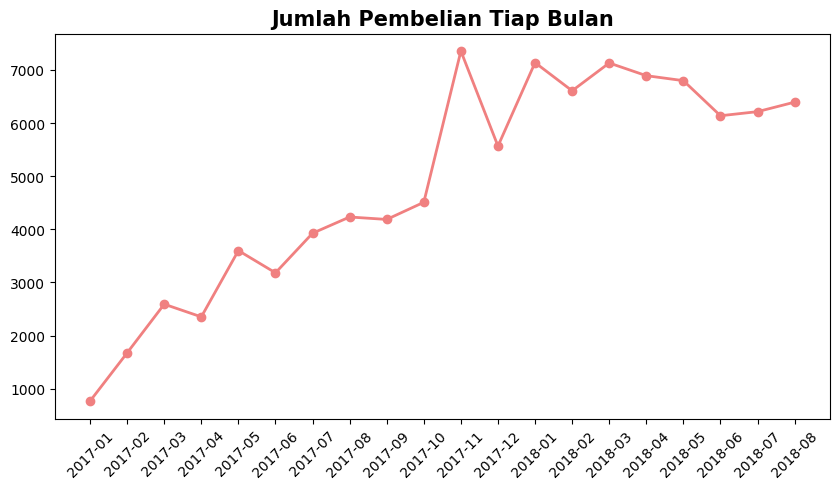

In [78]:
#Visualisasi jumlah revenue tiap bulan
monthly_orders_df = all_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "payment_value": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m') #mengubah format order date menjadi nama bulan

monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["order_purchase_timestamp"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="lightcoral")
plt.title("Jumlah Pembelian Tiap Bulan", loc="center", fontsize=15, fontweight='bold')
plt.xticks(rotation = 45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [52]:
monthly_orders_df

,order_purchase_timestamp,order_count,revenue
0,2017-01,766,130510.12
1,2017-02,1674,275562.12
2,2017-03,2591,418978.27
3,2017-04,2352,397419.10
4,2017-05,3601,576106.42
5,2017-06,3182,496068.51
6,2017-07,3928,575042.00
7,2017-08,4234,652419.31
8,2017-09,4188,708621.40
9,2017-10,4511,757563.70


In [53]:
#Mencari kota yang memiliki payment_value terbesar
city_payment = all_df.groupby('customer_city')['payment_value'].sum()
city_payment = city_payment.sort_values(ascending=False)
city_payment = pd.DataFrame(city_payment).reset_index()
city_payment

,customer_city,payment_value
0,sao paulo,2121162.32
1,rio de janeiro,1133064.81
2,belo horizonte,407553.24
3,brasilia,348311.16
4,curitiba,238685.78
...,...,...
4090,santo antonio do rio abaixo,24.23
4091,tamboara,24.09
4092,jenipapo de minas,22.58
4093,polo petroquimico de triunfo,20.70


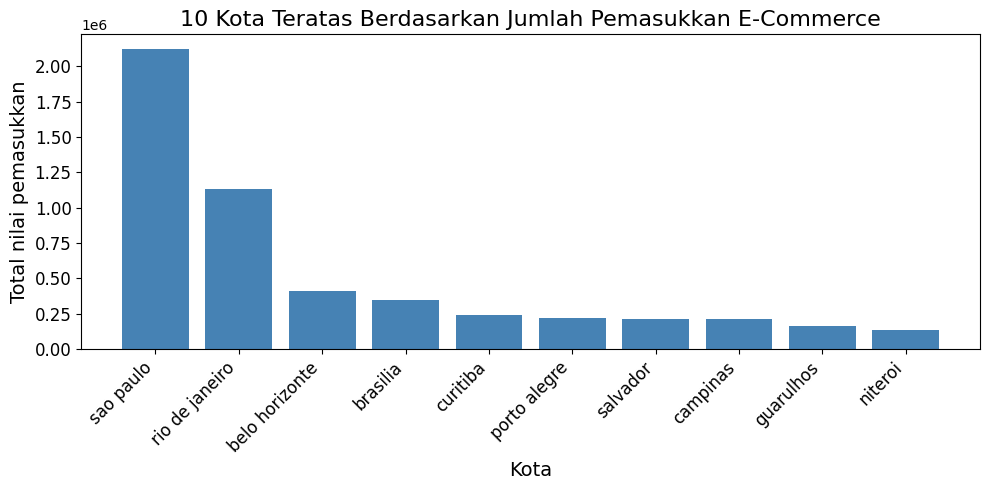

In [77]:
#Memilih 10 kota terbanyak
top_10_cities = city_payment.head(10)
plt.figure(figsize=(10, 5))
plt.bar(top_10_cities['customer_city'], top_10_cities['payment_value'], color='steelblue')
plt.title('10 Kota Teratas Berdasarkan Jumlah Pemasukkan E-Commerce', fontsize=16)
plt.xlabel('Kota', fontsize=14)
plt.ylabel('Total nilai pemasukkan', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

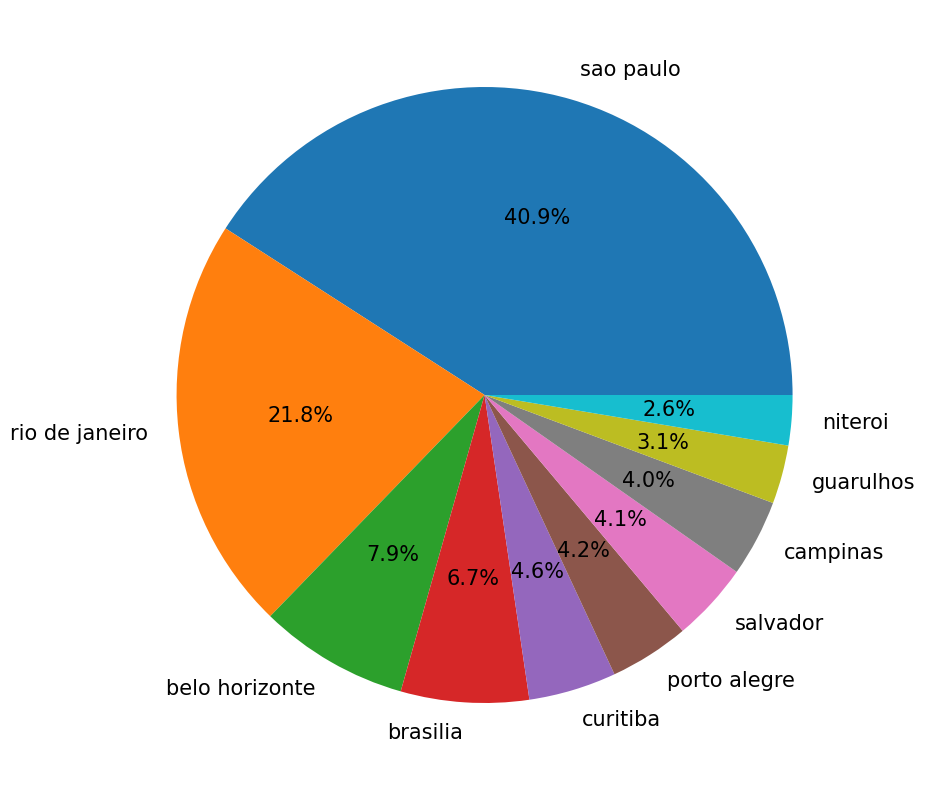

In [55]:
plt.figure(figsize=(20, 10))
plt.pie(
    x=top_10_cities.payment_value,
    labels=top_10_cities.customer_city,
    autopct='%1.1f%%',
    textprops={'fontsize': 15}
)
plt.show()

In [56]:
#Payment terbanyak di 5 kota payment value terbanyak
Five_cities = all_df[all_df['customer_city'].isin(['sao paulo', 'rio de janeiro','belo horizonte','brasilia','curitiba'])]
Five_cities
five_cities = Five_cities[['customer_city','payment_type']]
five_cities

,customer_city,payment_type
12,rio de janeiro,credit_card
19,sao paulo,credit_card
23,rio de janeiro,credit_card
26,sao paulo,credit_card
30,rio de janeiro,boleto
...,...,...
99424,rio de janeiro,credit_card
99427,belo horizonte,credit_card
99429,sao paulo,credit_card
99436,curitiba,boleto


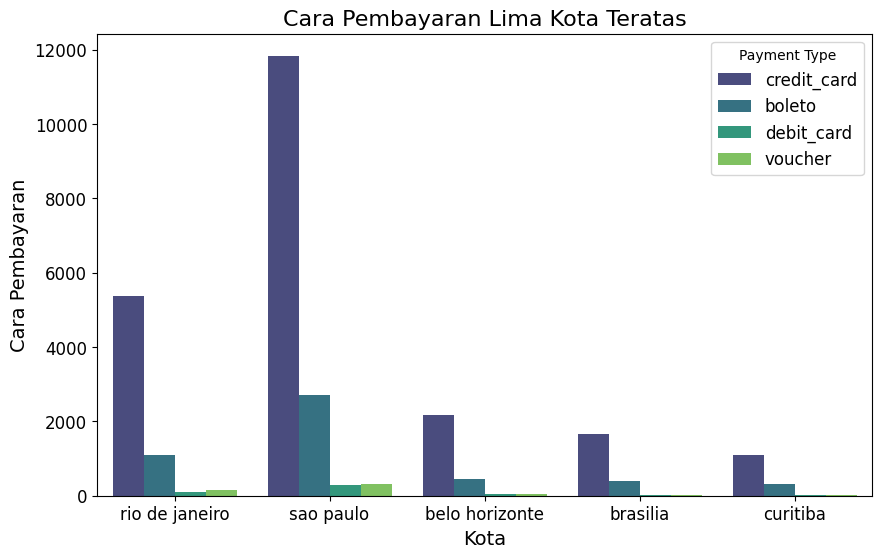

In [74]:
plt.figure(figsize=(10, 6))
sns.countplot(data=five_cities, x='customer_city', hue='payment_type', palette='viridis')
plt.title('Cara Pembayaran Lima Kota Teratas', fontsize=16)
plt.xlabel('Kota', fontsize=14)
plt.ylabel('Cara Pembayaran', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Payment Type', fontsize=12)
plt.show()

### Pertanyaan 1:

In [58]:
#Bagaimana kondisi penjualan dari tahun 2017 sampai Agustus 2018?

### Pertanyaan 2:

In [59]:
#Negara mana saja yang membuat penjualan terbanyak dan cara pembayaran mereka menggunakan apa?

###Pertanyaan 3:

In [60]:
#Apakah durasi pengiriman berpengaruh terhadap review pelanggan?

## Conclusion

- Conclusion pertanyaan 1:
  Penjualan dari Januari 2017 sampai Agustus 2018 cukup baik. Kondisi penjualan dari 2017 akhir sampai Agustus 2018 cenderung stabil dan tinggi.
- Conclusion pertanyaan 2:
  5 kota yang melakukan pembelian terbanyak yaitu Sao Paulo,
Rio de Janeiro, Belo Horizonte, Brasilia, dan Curitiba. Kelima kota tersebut memiliki kartu kredit sebagai cara pembayaran terbanyak, dan diikuti dengan cara pembayaran boleto. Hal ini dapat menjadi peluang besar, seperti bekerja sama dengan pihak kartu kredit.
- Conclusion pertanyaan 3:
  Dari hasil korelasi, durasi pengiriman dan review pelanggan hampir tidak memiliki korelasi karena nilainya mendekati nol.

##Akhir

In [61]:
all_df.to_csv("all_data.csv", index=False)